# Pandas Practice Task 2
> Problem Statement: Analyzing Customer Purchase Behavior

You have been provided with a dataset containing information about customer transactions from an online retailer. The data includes information such as customer ID, product ID, purchase date, price, and more. The goal is to use Pandas to preprocess, clean, and analyze the data to gain insights into customer purchase behavior and product popularity.

The specific tasks you might undertake could include:

- Cleaning and preprocessing the data to remove duplicates, missing values, and other errors.

- Merging and aggregating the data to create summary tables and metrics, such as total sales by product or customer.

- Analyzing the data to identify trends and patterns in customer purchase behavior, such as which products are frequently purchased together, which products are popular at different times of year, or which customers are most valuable to the business.

- Creating visualizations to help communicate the results of your analysis, such as scatter plots, bar charts, or heat maps.

This problem statement is a practical and relevant task that requires expertise in data manipulation, cleaning, and analysis using Pandas. It provides a good opportunity to practice your skills in handling complex datasets and exploring them using Pandas. Additionally, the problem is relevant and practical, making it a great task for an advanced data science learner who is interested in working with Pandas.

There are various datasets that you could use for the problem statement I suggested. Here are a few possible sources:

The Online Retail Data Set: This dataset contains transactional data of a UK-based online retailer from 2010 to 2011. You can download it from the UCI Machine Learning Repository at https://archive.ics.uci.edu/ml/datasets/Online+Retail+II.


# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset
> The Given data is in excel format and have two sheet so we loading each sheet one by one.

In [3]:
df1 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('online_retail_II.xlsx', sheet_name='Year 2010-2011')

# Combine the two DataFrames
> Here we load data in two dataframe so we concatnating both to make one dataframe.

In [14]:
df = pd.concat([df1, df2], ignore_index=True)

# Quick Look of Data

In [15]:
#frist five rows of df
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [16]:
#last 5 rows of df
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,2011-12-09 12:50:00,18.00,12680.0,France


In [17]:
#no of Rows and columns
df.shape

(1067371, 8)

In [18]:
#it gives detail information about rows and columns with their datatypes null count and memory useage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 65.1+ MB


In [49]:
#changing Datatype of Customer ID column
df['Customer ID'] = df['Customer ID'].astype(int)

# Checking for duplicates
> Frist of all we checking for duplicate values and removing duplicate values from the dataset.

In [20]:
print('Number of duplicates:', df.duplicated().sum())

Number of duplicates: 34335


In [21]:
df.drop_duplicates(inplace=True)

# Check for missing values
> Now we are checking for missing values we have alot of data so we can ingnore if there are missing values less than 2 to 3 % or greater than 20 % to get accurate result.

In [22]:
print('Percentage of missing values:\n', df.isnull().sum()*100/len(df))

Percentage of missing values:
 Invoice         0.000000
StockCode       0.000000
Description     0.413829
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.763098
Country         0.000000
dtype: float64


In [23]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4275
Quantity            0
InvoiceDate         0
Price               0
Customer ID    235151
Country             0
dtype: int64

#### We have two missing values columns Description and Customer ID
- Description have 0.41 so we can ingnore it 
- Customer Id have 22% this we can fill by Mode (most repeted ID) but it have large number of missing value so we drop it to get more accurate result.

In [24]:
#droping all Null values
df.dropna(inplace=True)

# Statistical Summery of Dataset
> It tells short statistical summery of out data .by this summary we can find the spread of data min and max values and quartile values.

In [25]:
df.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


**Quantity and Price canot be negative so we need to Remove negative values.**

# Removing Negative Quatity and Price Values

In [26]:
df = df[df['Quantity'] > 0]   # remove rows with negative Quantity
df = df[df['Price'] > 0]      # remove rows with negative Price

# Date Time
> InvoiceDate column have date and time so we Extracting day , moth , year and time from them sso we can deeply analyze the data.

In [27]:
# Convert InvoiceDate to a datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract day, year, time and hour
df['Day'] = df['InvoiceDate'].dt.day
df['Month'] = df['InvoiceDate'].dt.month
df['Year'] = df['InvoiceDate'].dt.year
df['Time'] = df['InvoiceDate'].dt.time
df['Hour'] = df['InvoiceDate'].dt.hour

In [28]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Day,Month,Year,Time,Hour
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,1,12,2009,07:45:00,7
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,12,2009,07:45:00,7
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,1,12,2009,07:45:00,7
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,1,12,2009,07:45:00,7
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,1,12,2009,07:45:00,7


In [29]:
#now we droping the invice date columns
df.drop('InvoiceDate', axis=1, inplace=True)

In [30]:
# create a new column called "TotalPrice" by multiplying Quantity and Price
df['TotalPrice'] = df['Quantity'] * df['Price']

In [31]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Day,Month,Year,Time,Hour,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,1,12,2009,07:45:00,7,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,1,12,2009,07:45:00,7,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,1,12,2009,07:45:00,7,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,1,12,2009,07:45:00,7,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,1,12,2009,07:45:00,7,30.0


# The top 10 customers

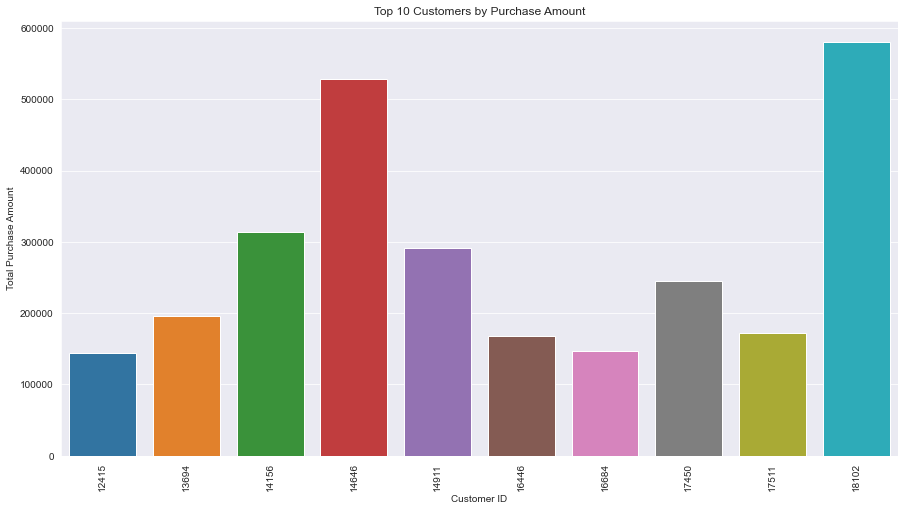

In [81]:
top_customers = df.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(15,8))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Purchase Amount')
plt.xlabel('Customer ID')
plt.xticks(rotation = 90)
plt.ylabel('Total Purchase Amount')
plt.show()

##### Customer ID 18102 have highest Purchase

## Top 10 Most Selling items

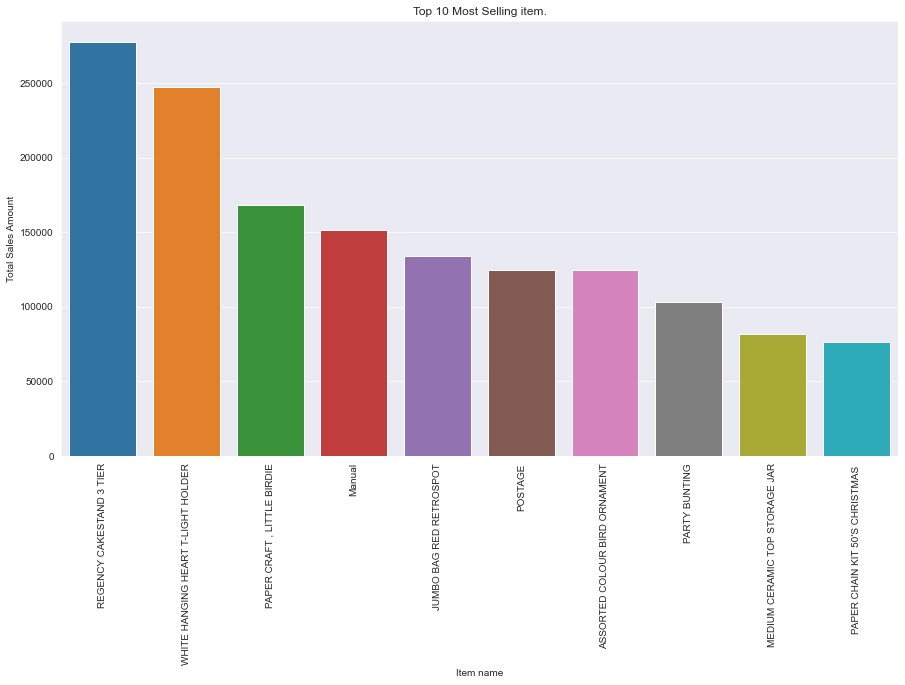

In [82]:
top_item = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(15,8))
sns.barplot(x=top_item.index, y=top_item.values)
plt.title('Top 10 Most Selling item.')
plt.xticks(rotation = 90)
plt.ylabel('Total Sales Amount')
plt.xlabel('Item name')
plt.show()

##### Regency cakestand 3 Tier hav most selling item .

# Top five Purchasing Country.

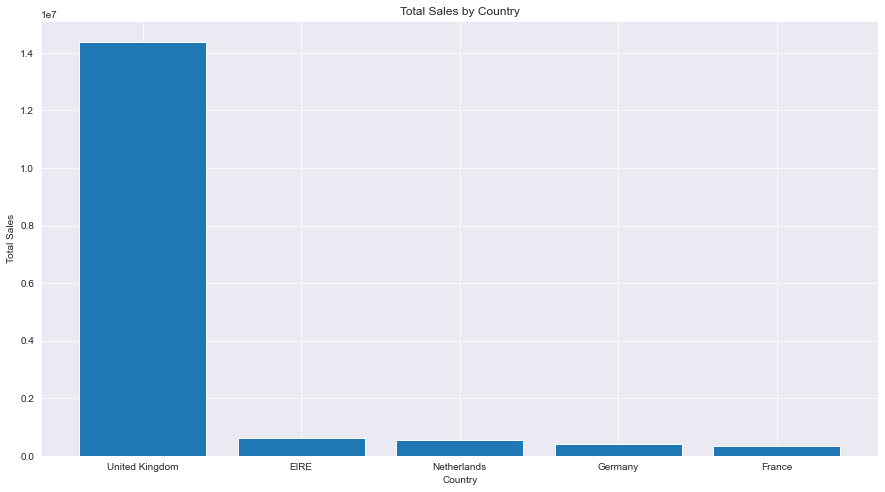

In [83]:
# Calculate total sales by country
sales_by_country = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Sort the sales by descending order
sales_by_country = sales_by_country.sort_values(by='TotalPrice', ascending=False).head(5)

# Create the bar chart
plt.figure(figsize=(15,8))
plt.bar(sales_by_country['Country'], sales_by_country['TotalPrice'])
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Total Sales by Country')
plt.show()

##### UK have higest Slaes in all the country.

## Sales By year

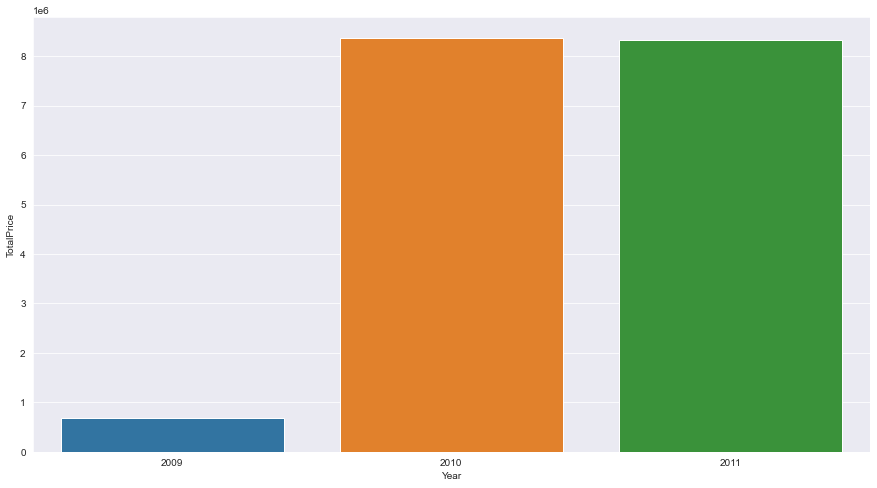

In [84]:
# Group by year and sum TotalPrice
sales_by_year = df.groupby('Year')['TotalPrice'].sum().reset_index()

# Create bar chart using Seaborn
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(x='Year', y='TotalPrice', data=sales_by_year)
plt.show()

##### 2010 and 2011 have almost same sales but 2009 have least sales.

## Sales By Months

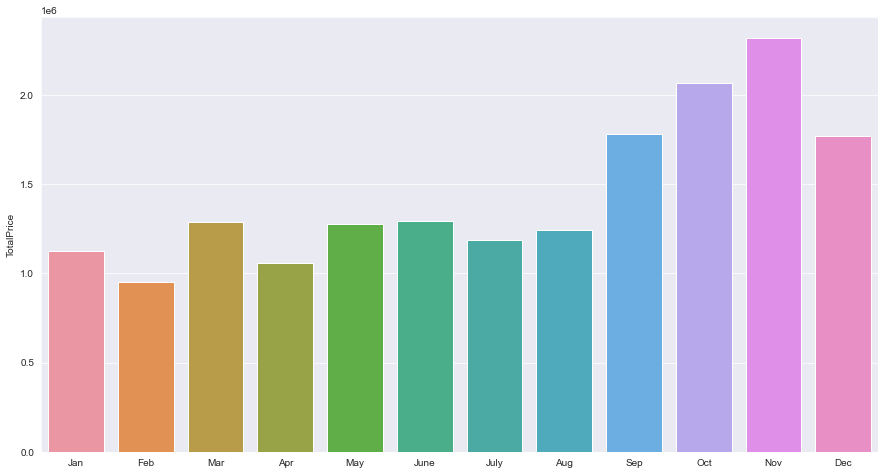

In [85]:
# Group by months and sum TotalPrice
sales_by_months = df.groupby('Month')['TotalPrice'].sum().reset_index()
month=['Jan', 'Feb','Mar','Apr', 'May', 'June', 'July', "Aug", "Sep", 'Oct', 'Nov', 'Dec']
# Create bar chart using Seaborn
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.barplot(x=month, y=sales_by_months['TotalPrice'], data=sales_by_year)
plt.show()

#### November have higest sales in all months.

## Sales by Day

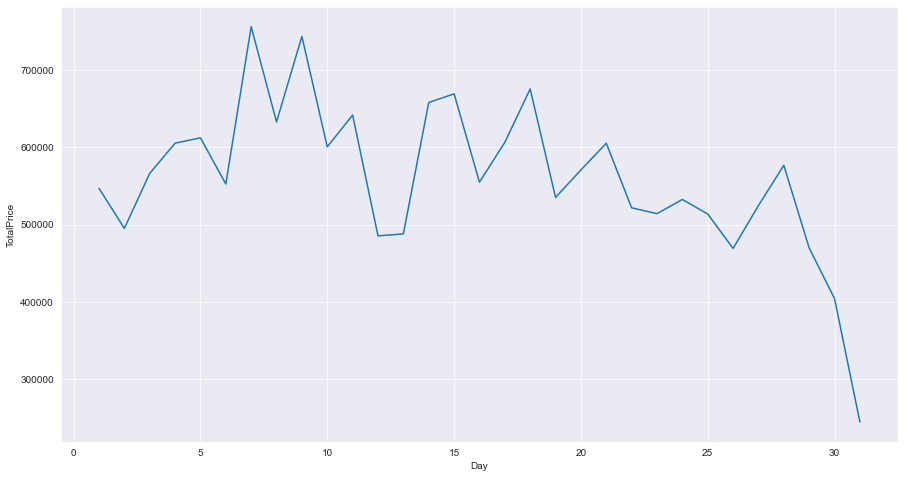

In [78]:
# Group by day and sum TotalPrice
sales_by_months = df.groupby('Day')['TotalPrice'].sum().reset_index()

# Create bar chart using Seaborn
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
sns.lineplot(x=sales_by_months.Day, y=sales_by_months.TotalPrice, data=sales_by_year)
plt.show()

##### 5 and 7 Dates of the moths have 

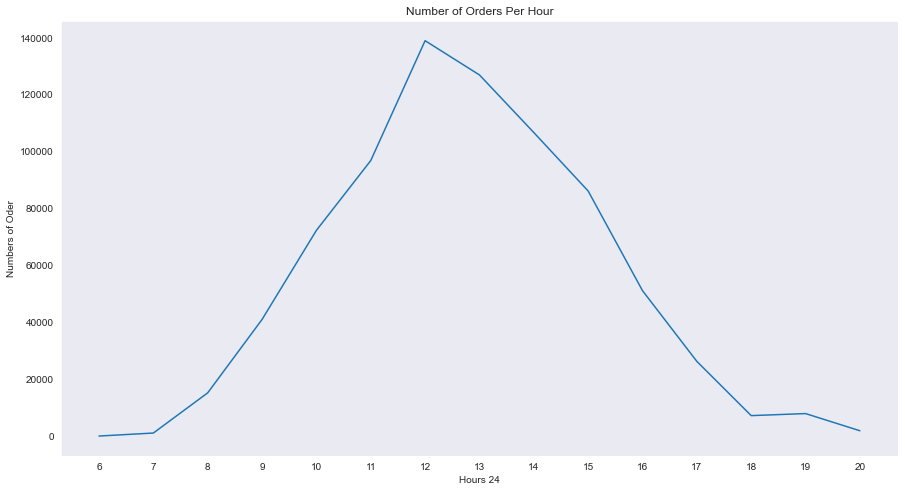

In [91]:
c=df.groupby('Hour').count()
hours=[hour for hour , df in df.groupby('Hour')]
plt.figure(figsize=(15,8))
plt.plot(hours,c['Quantity'])
plt.xticks(hours)
plt.title('Number of Orders Per Hour')
plt.xlabel('Hours 24')
plt.ylabel('Numbers of Oder')
plt.grid()
plt.show()

#### Sales are increasing contantly from 7 am to 12 am. At 12 am is top seeling hour and then decreasing.

In [59]:
# Create a summary table of total sales by product
product_sales = df.groupby('StockCode')['Quantity'].sum().reset_index()
print(product_sales.head())

  StockCode  Quantity
0     10002      8479
1     10080       303
2     10109         4
3     10120       648
4     10125      1970
